Problem statement: Predict price of a electric car, based on certain predictors. 
The data consists of 180 vehicles and there are some missing values as well. 
We can conduct various data analytics visualizations to understand the data and information. This gives us an idea about the market as a whole and overall data distribution. Often, 
this type of data gives insight into the market and lets businesses conduct market research. The electric vehicle market is growing at a fast pace, with proper investment and research, the field can be improved and a higher level of efficiency can be achieved.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv('Cheapestelectriccars-EVDatabase.csv')

In [3]:
df1.head(2)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"


In [4]:
df1.count()

Name               180
Subtitle           180
Acceleration       180
TopSpeed           180
Range              180
Efficiency         180
FastChargeSpeed    180
Drive              180
NumberofSeats      180
PriceinGermany     168
PriceinUK          136
dtype: int64

In [5]:
df1.describe()

,NumberofSeats
count,180.000000
mean,5.166667
std,0.971666
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [7]:
df1.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [19]:
#filling empty data with 0
df1 = df1.fillna('0')

In [9]:
df1.isna().sum()

Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
PriceinUK          0
dtype: int64

In [10]:
#Get the name of the car manufacturer 
df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]

In [11]:
df1['Manufacturer']

0         Opel
1      Renault
2       Nissan
3         Audi
4      Porsche
        ...   
175         MG
176      Tesla
177         MG
178       Audi
179       Audi
Name: Manufacturer, Length: 180, dtype: object

In [12]:
pd.options.display.float_format = '{:,.0f}'.format

In [13]:
#cleaning the data (Pandas metod)
#removing currency sign

df1['PriceinUK'] = pd.to_numeric(df1.PriceinUK.replace({'£':''}, regex=True).replace({',':''}, regex=True), errors='coerce')



In [ ]:
 """#cleaning the data (alternative method using python)
#removing currency sign
/*PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK""" 

In [14]:
df1['PriceinUK'].head()

0         0
1     31680
2     25995
3     79900
4    138830
Name: PriceinUK, dtype: int64

In [ ]:
"""PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany"""

In [15]:
df1.PriceinGermany = pd.to_numeric(df1.PriceinGermany.replace({'€':''}, regex=True).replace({',':''}, regex=True), errors='coerce')

In [16]:
df1.PriceinGermany.head()

0     42990
1         0
2     29990
3         0
4    186336
Name: PriceinGermany, dtype: int64

In [ ]:
"""FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed"""

In [17]:
df1.FastChargeSpeed = pd.to_numeric(df1.FastChargeSpeed.replace({'km/h':''}, regex=True).replace({'-':''}, regex=True), errors='coerce')  

In [20]:
df1.FastChargeSpeed

0     210
1       0
2     230
3     600
4     860
       ..
175   390
176   820
177   340
178   470
179   520
Name: FastChargeSpeed, Length: 180, dtype: object

In [ ]:
"""Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency"""

In [21]:
df1.Efficiency = pd.to_numeric(df1.Efficiency.replace({' Wh/km':''}, regex=True), errors='coerce') 

In [22]:
df1.Efficiency

0      173
1      194
2      164
3      231
4      215
      ... 
175    191
176    155
177    168
178    199
179    180
Name: Efficiency, Length: 180, dtype: int64

In [23]:
df1.Range = pd.to_numeric(df1.Range.replace({' km':''}, regex=True), errors='coerce') 

"""Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range"""
df1.Range

0      335
1      160
2      220
3      375
4      390
      ... 
175    340
176    490
177    340
178    385
179    425
Name: Range, Length: 180, dtype: int64

In [24]:
df1.TopSpeed = pd.to_numeric(df1.TopSpeed.replace({' km/h':''}, regex=True), errors='coerce') 

"""TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed"""

df1.TopSpeed 

0      150
1      130
2      144
3      200
4      260
      ... 
175    200
176    233
177    185
178    180
179    160
Name: TopSpeed, Length: 180, dtype: int64

In [25]:
pd.options.display.float_format = '{:,.2f}'.format

In [26]:
df1.Acceleration = pd.to_numeric(df1.Acceleration.replace({' sec':''}, regex=True), errors='coerce') 
#df1.Acceleration = df1.Acceleration.replace({' sec':''}, regex=True)
"""Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration"""
df1.Acceleration.head()

0    7.30
1   22.40
2    7.90
3    5.70
4    2.80
Name: Acceleration, dtype: float64

In [27]:
#df1.Subtitle = pd.to_numeric(df1.Subtitle.replace({'Battery Electric Vehicle | ':''}, regex=True).replace({' kWh':''}, regex=True).replace({'      ':''},regex=True), errors='coerce') 

#df1.Subtitle = df1.Subtitle.replace({'kWh':''}, regex=True)
#df1.Subtitle = df1.Subtitle.replace({'Battery Electric Vehicle |':''}, regex=True)
#df1.Subtitle = df1.Subtitle.replace({'|':''},regex=True)

Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

In [28]:
df1['Subtitle']

0     58.00
1     31.00
2     36.00
3     86.50
4     83.70
       ... 
175   65.00
176   76.00
177   57.00
178   76.60
179   76.60
Name: Subtitle, Length: 180, dtype: float64

In [29]:
df1= df1.rename(columns = {'Subtitle':'KWH'})

In [30]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.00,7.30,150,335,173,210.00,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.00,22.40,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.00,7.90,144,220,164,230.00,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.50,5.70,200,375,231,600.00,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.70,2.80,260,390,215,860.00,All Wheel Drive,4,186336,138830,Porsche


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    object 
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 17.0+ KB


In [32]:
df1.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.00,-0.62,0.69,0.89,0.36,0.13,0.60,0.62
Acceleration,-0.62,1.00,-0.82,-0.71,0.14,0.32,-0.50,-0.67
TopSpeed,0.69,-0.82,1.00,0.76,-0.05,-0.24,0.68,0.79
Range,0.89,-0.71,0.76,1.00,-0.07,-0.07,0.57,0.62
Efficiency,0.36,0.14,-0.05,-0.07,1.00,0.60,0.24,0.08
NumberofSeats,0.13,0.32,-0.24,-0.07,0.60,1.00,-0.01,-0.21
PriceinGermany,0.60,-0.50,0.68,0.57,0.24,-0.01,1.00,0.70
PriceinUK,0.62,-0.67,0.79,0.62,0.08,-0.21,0.70,1.00


<AxesSubplot:>

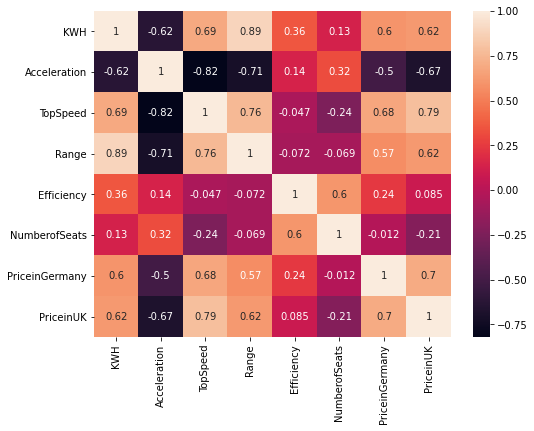

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

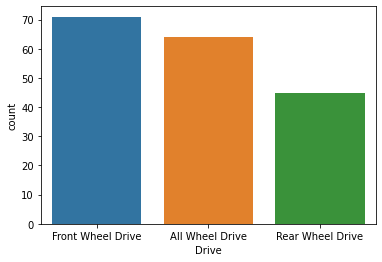

In [34]:
sns.countplot(x = 'Drive', data = df1)


<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

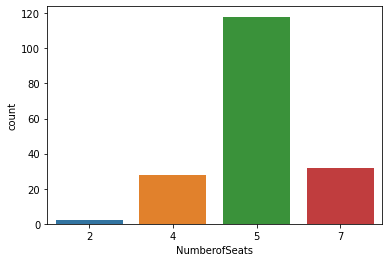

In [35]:
sns.countplot(x = 'NumberofSeats', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

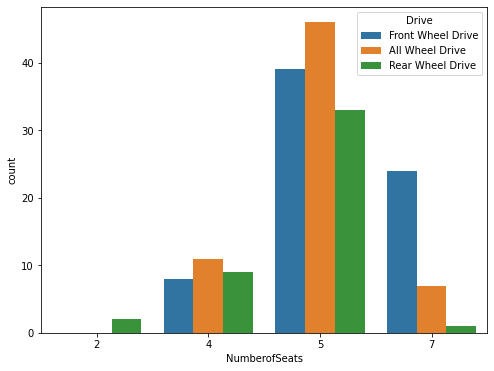

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

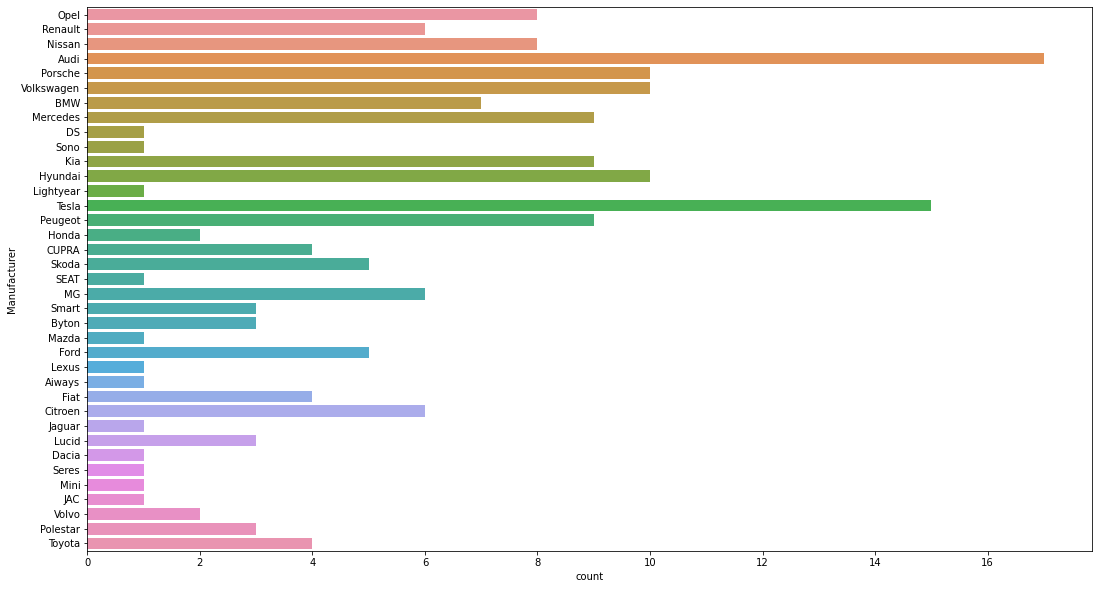

In [37]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)

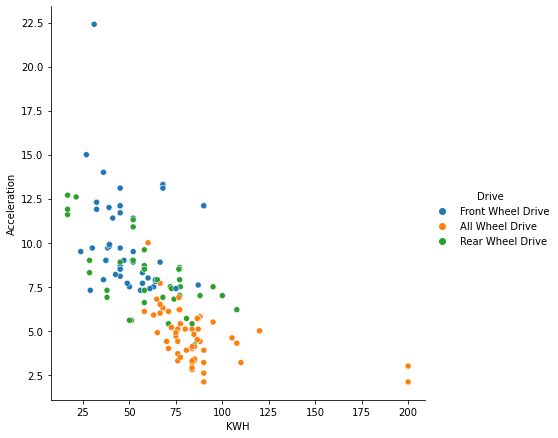

In [38]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)


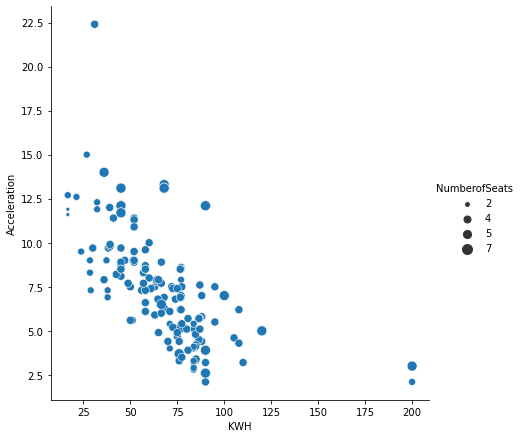

In [39]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)


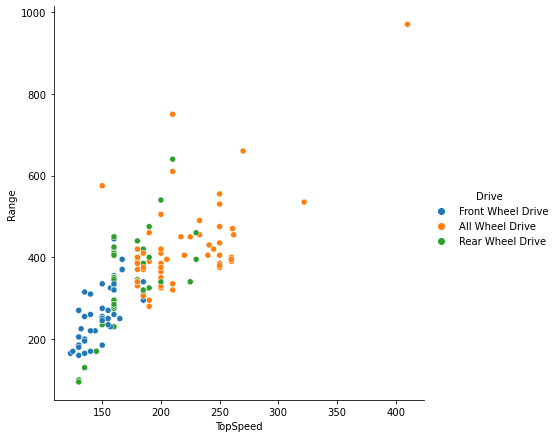

In [40]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)


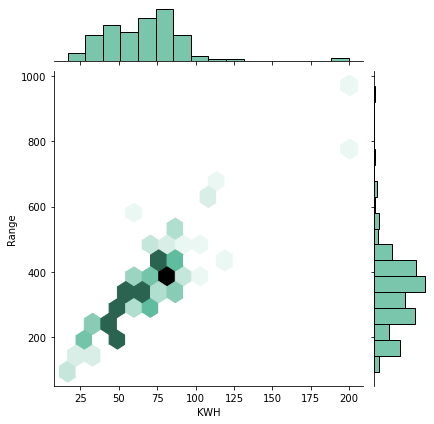

In [41]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")


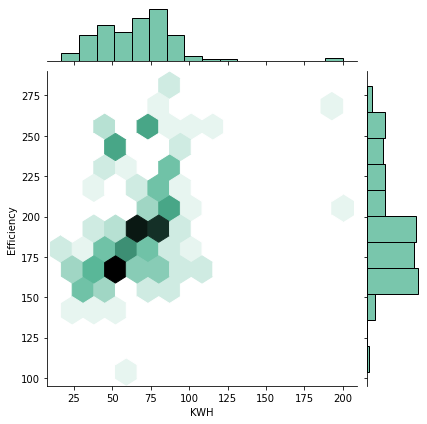

In [42]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")


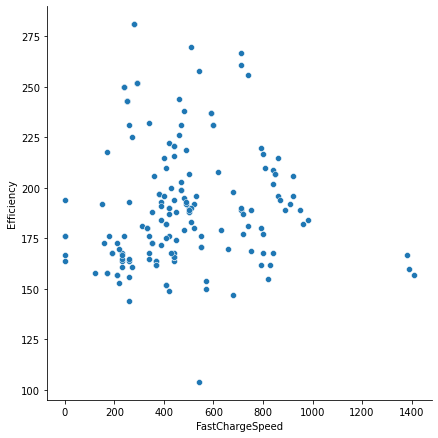

In [43]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)


Machine Learning Model For Price Prediction of Electric Vehicles

In [44]:
 pd.options.mode.chained_assignment = None

In [45]:
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val

In [ ]:
!pip install category_encoders

In [46]:
import category_encoders as ce
train_df=df1
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data

In [47]:
df_train

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.00,7.30,150,335,173,210.00,1,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.00,22.40,130,160,194,0,1,5,0,31680,Renault
2,Nissan Leaf,36.00,7.90,144,220,164,230.00,1,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.50,5.70,200,375,231,600.00,3,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.70,2.80,260,390,215,860.00,3,4,186336,138830,Porsche
...,...,...,...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,65.00,7.90,200,340,191,390.00,2,5,40000,34000,MG
176,Tesla Model 3 Long Range Dual Motor,76.00,4.40,233,490,155,820.00,3,5,53560,45526,Tesla
177,MG MG5 EV Long Range,57.00,7.70,185,340,168,340.00,1,5,0,26495,MG
178,Audi Q4 e-tron 45 quattro,76.60,6.90,180,385,199,470.00,3,5,50900,43265,Audi


In [48]:
X= df_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values

In [49]:
X

array([[58.0, 7.3, 150, ..., 210.0, 1, 5],
       [31.0, 22.4, 130, ..., '0', 1, 5],
       [36.0, 7.9, 144, ..., 230.0, 1, 5],
       ...,
       [57.0, 7.7, 185, ..., 340.0, 1, 5],
       [76.6, 6.9, 180, ..., 470.0, 3, 5],
       [76.6, 8.5, 160, ..., 520.0, 2, 5]], dtype=object)

In [50]:
y=df_train['PriceinUK'].values

In [51]:
X.shape

(180, 8)

In [52]:
y.shape

(180,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


In [54]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [55]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [56]:
y_pred= regressor.predict(X_test)


In [57]:
y_test


array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580])

In [58]:
y_pred


array([ 54441.6325    ,  31066.27555556,  41380.        ,  45479.69333333,
       114520.10011111,  35399.57666667,  40735.42897222,  32830.70111111,
        54001.08666667,  54295.79666667,  31681.26083333,  49643.10804365,
        40735.42897222,  35409.45458333,  64010.02277778,  49643.10804365,
        46875.94537302,  44265.14      ,  47877.97145238,  26695.64938889,
        53521.39666667,  71343.52896032,  74522.66555556,  86362.50333333,
        31944.27194444,  49637.88687698,  33099.70666667,  50518.21761905,
        36664.97611111,  84756.28011111,  26485.26066667,  55484.98333333,
        33099.70666667,  81142.91716667,  23535.63061111,  36504.92666667,
        49637.88687698,  41719.56333333,  31008.96444444,  71014.14102381,
        33094.92033333,  53272.6       ,  54491.59777778,  64035.14169048,
        49643.10804365,  58952.72694444,  23120.55166667,  37367.93833333,
        48409.47016667,  70814.42507143, 127800.99333333,  53660.58111111,
        32744.97711111,  

In [59]:
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7155.050407804233


In [60]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  107902152.72013463


In [61]:
#Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10387.596099200942


In [62]:
#R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.815987092758551
